In [17]:
!pip install qiskit
import qiskit as q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 1.3 MB/s 
     |████████████████████████████████| 18.0 MB 1.2 MB/s 
     |████████████████████████████████| 240 kB 51.5 MB/s 
     |████████████████████████████████| 198 kB 37.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 48.9 MB/s 
     |████████████████████████████████| 1.6 MB 33.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 41.8 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 4.0 MB 26.2 MB/s 
     |████████████████████████████████| 112 kB 50.0 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=c9cfb0da19

In [18]:
!pip install pylatexenc
import pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 7.6 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=d9502a4d28368f9afbe33b537065e18e1c3568f57a72affce181eba52063ba18
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [19]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit import QuantumRegister
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
import matplotlib.pyplot as plt

sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit


In [185]:
import time
import matplotlib.pyplot as plt
from IPython import display
True

True

In [24]:
import numpy as np
from qiskit.circuit.library import Diagonal
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.converters import circuit_to_dag, dag_to_circuit


In [27]:
def fun(a,b,c):
  fun= (not c or (a and (not b)))
  if fun==True:
    fun=1
  else :
    fun=0
  return fun

In [141]:
diag=np.arange(64).reshape(8,8)
for i in [0,1]:
   if i==0:
        a=False
   else :
        a=True
   for j in [0,1]:

       if j==0:
        b=False
       else :
        b=True 
       for k in [0,1]:
          if k==0:
            c=False
          else :
            c=True 
          z=i*(4)+j*(2)+k
          for y in range(0,8):
                     if y==z:
                        diag[y,z]=(-1)**(fun(a,b,c)) 
                     else:
                        diag[y,z]=0
print(diag)

[[-1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  1]]


In [106]:
num_q = 3

refl_qr = QuantumRegister(num_qubits)
refl_qc = QuantumCircuit(refl_qr, name='reflection')
refl_qc.h([0,1,2])
refl_qc.x([0,1,2])
refl_qc.h([2])
refl_qc.mct(list(range(2)),2)
refl_qc.h(2)
refl_qc.x([0,1,2])
refl_qc.h([0,1,2])
refl_qc.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q12_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
       ├───┤├───┤       │  ├───┤├───┤     
q12_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
       ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q12_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
       └───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [177]:
#oracle code
ora=QuantumCircuit(3,name='oracle')
racl=Operator(diag)
ora.unitary(racl,[0,1,2],label='ora')
ora.draw()

┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1 ora ├
     │      │
q_2: ┤2     ├
     └──────┘

In [180]:
grov_qr = QuantumRegister(5)
grov_qc = QuantumCircuit(grov_qr, name='Ora')
grov_qc.h([0,1,2,3,4])
grov_qc.append(ora,[2,3,4])
grov_qc.append(refl_qc,[2,3,4])
grov_qc.append(ora,[2,3,4])
grov_qc.append(refl_qc,[2,3,4])

grov_qc.measure_all()
grov_qc.draw()

┌───┐                                                     ░ ┌─┐      »
q255_0: ┤ H ├─────────────────────────────────────────────────────░─┤M├──────»
        ├───┤                                                     ░ └╥┘┌─┐   »
q255_1: ┤ H ├─────────────────────────────────────────────────────░──╫─┤M├───»
        ├───┤┌─────────┐┌─────────────┐┌─────────┐┌─────────────┐ ░  ║ └╥┘┌─┐»
q255_2: ┤ H ├┤0        ├┤0            ├┤0        ├┤0            ├─░──╫──╫─┤M├»
        ├───┤│         ││             ││         ││             │ ░  ║  ║ └╥┘»
q255_3: ┤ H ├┤1 oracle ├┤1 reflection ├┤1 oracle ├┤1 reflection ├─░──╫──╫──╫─»
        ├───┤│         ││             ││         ││             │ ░  ║  ║  ║ »
q255_4: ┤ H ├┤2        ├┤2            ├┤2        ├┤2            ├─░──╫──╫──╫─»
        └───┘└─────────┘└─────────────┘└─────────┘└─────────────┘ ░  ║  ║  ║ »
meas: 5/═════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                     0  1  2 »
«              
«q255_0: ──────
«              
«q255_1: ──────
«              
«q255_2: ──────
«        ┌─┐   
«q255_3: ┤M├───
«        └╥┘┌─┐
«q255_4: ─╫─┤M├
«         ║ └╥┘
«meas: 5/═╩══╩═
«         3  4

In [183]:
grov_qr1 = QuantumRegister(3)
grov_qc2 = QuantumCircuit(grov_qr1, name='Ora')
grov_qc2.h([0,1,2])
grov_qc2.append(ora,[0,1,2])
grov_qc2.append(refl_qc,[0,1,2])
grov_qc2.append(ora,[0,1,2])
grov_qc2.append(refl_qc,[0,1,2])

grov_qc2.measure_all()
grov_qc2.draw()

┌───┐┌─────────┐┌─────────────┐┌─────────┐┌─────────────┐ ░ ┌─┐      
q279_0: ┤ H ├┤0        ├┤0            ├┤0        ├┤0            ├─░─┤M├──────
        ├───┤│         ││             ││         ││             │ ░ └╥┘┌─┐   
q279_1: ┤ H ├┤1 oracle ├┤1 reflection ├┤1 oracle ├┤1 reflection ├─░──╫─┤M├───
        ├───┤│         ││             ││         ││             │ ░  ║ └╥┘┌─┐
q279_2: ┤ H ├┤2        ├┤2            ├┤2        ├┤2            ├─░──╫──╫─┤M├
        └───┘└─────────┘└─────────────┘└─────────┘└─────────────┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════════════════════════════════════╩══╩══╩═
                                                                     0  1  2

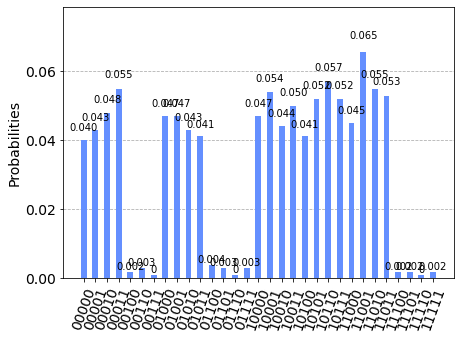

In [186]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grov_qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

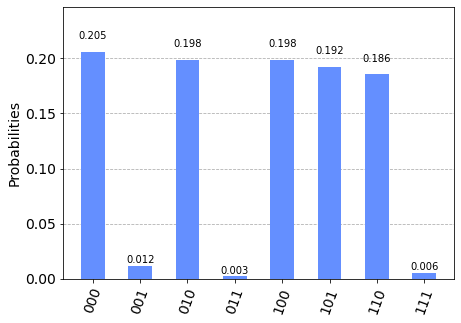

In [187]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grov_qc2, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)